In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
messages = pd.read_json('ibm.json')
messages

,Article,Date,Link
0,IBM Study: C-Suite Executives Declare One-Vend...,2021-10-28,https://newsroom.ibm.com/2021-10-28-IBM-Study-...
1,IBM Acquires Leading Adobe Workfront Consultancy,2021-10-19,https://newsroom.ibm.com/2021-10-19-IBM-Acquir...
2,Virgin Megastore in Saudi Arabia to Accelerate...,2021-10-13,https://newsroom.ibm.com/2021-10-13-Virgin-Meg...
3,IBM Reports 2021 Third-Quarter Results,2021-10-20,https://newsroom.ibm.com/2021-10-20-IBM-Report...
4,Leading Financial Institutions Publish Detaile...,2021-10-19,https://newsroom.ibm.com/2021-10-19-Leading-Fi...
...,...,...,...
3974,National Bank Financial Group Signs CDN$450-Mi...,2009-04-16,https://newsroom.ibm.com/2009-04-16-National-B...
3975,IBM Introduces Products and Services to Combat...,2009-04-21,https://newsroom.ibm.com/2009-04-21-IBM-Introd...
3976,Equifax Extends Technology Services Agreement ...,2009-04-17,https://newsroom.ibm.com/2009-04-17-Equifax-Ex...
3977,HDFC Bank Appoints IBM to Support Business Growth,2009-04-21,https://newsroom.ibm.com/2009-04-21-HDFC-Bank-...


In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [10]:
message_text = str(messages.Article.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

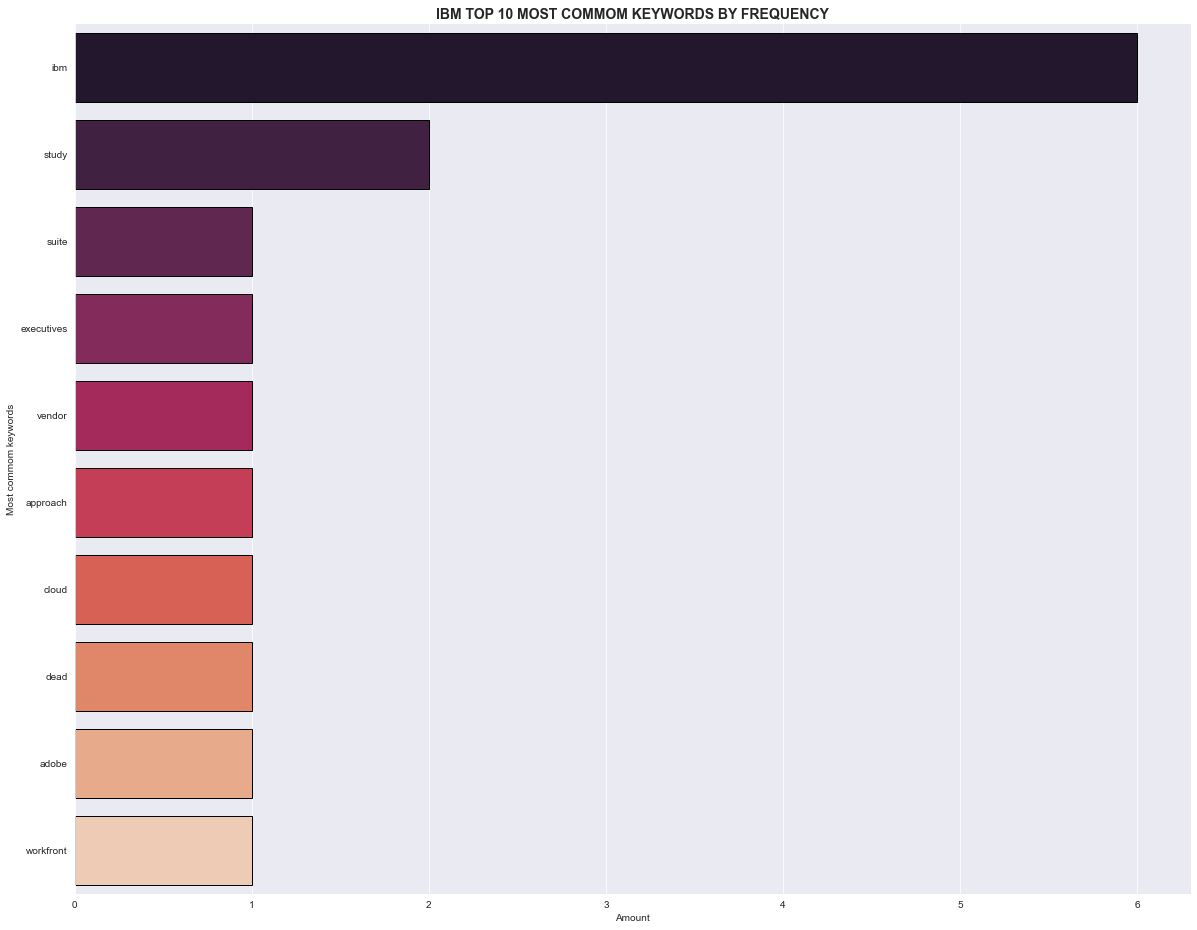

In [12]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('IBM TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('ibm_keywords.png')